In [53]:
from sklearn.cluster import KMeans
from numpy import sqrt, random, array, argsort
from sklearn.preprocessing import scale
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
## Anamoly Detection with DBSCAN
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
from numpy import random, where
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
## Anamoly Detection with SVM
from sklearn.svm import OneClassSVM
from sklearn.datasets import make_blobs
from numpy import quantile, where, random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, preprocessing, model_selection, pipeline, ensemble, tree, datasets, cluster
sns.set(style = 'white', font_scale = 1.4)

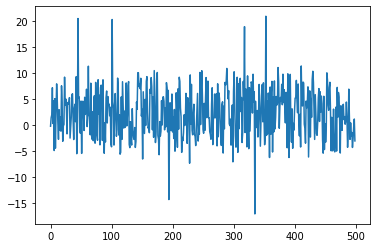

In [10]:
## Geberate the Data
random.seed(123)
def makeDtata(N):
    x = []
    for i in range(N):
        a = i/1000 + random.uniform(-3,2)
        r = random.uniform(-5,10)
        if (r>=9.9):
            r = r+10
        elif (r<(-4.8)):
            r = r+(-10)
        x.append([a+r])
    return array(x)

x = makeDtata(500)
x_ax = range(500)
plt.plot(x_ax, x)
plt.show()

## Anamoly Detection with K-means

KMeans(n_clusters=1)
x_shape: (500, 1)
center is: [[-8.17124146e-17]]
distance_shape: (500, 1)
[[101]
 [ 45]
 [353]
 [335]] [[[ 3.76918115]]

 [[ 3.80914366]]

 [[ 3.90096151]]

 [[-4.05640939]]]


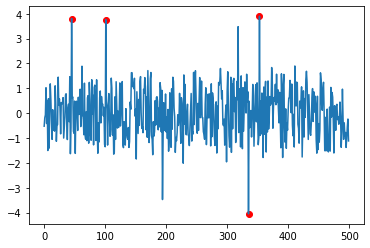

In [29]:
x = scale(x)
kmeans = KMeans(n_clusters=1).fit(x)
# print(kmeans)
print("x_shape:", x.shape)
## 2)Find the Centroids
center = kmeans.cluster_centers_
print("center is:", center)
###3)Finding the distance to centroids of K-means to each data point
distance = sqrt((x-center)**2)
print("distance_shape:",distance.shape)
## Find the index and values of anomalies as follows:
order_index = argsort(distance, axis=0)
# print(order_index[-4:])
outlier_index = order_index[-4:]
outlier_values = x[outlier_index]
print(outlier_index, outlier_values)
# Plot_outliers
plt.plot(x_ax, x)
plt.scatter(outlier_index,outlier_values,color="r")
plt.show()

In [1]:
######## Load the Data
data  =  pd.DataFrame(datasets.load_boston().data, columns = datasets.load_boston().feature_names)
y = datasets.load_boston().target

/Users/faezehghazi/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the Californ

In [2]:
features = ['CRIM', 'LSTAT', 'RM', 'AGE', 'INDUS', 'NOX', 'DIS']
data = data[features]
data.head()

,CRIM,LSTAT,RM,AGE,INDUS,NOX,DIS
0,0.00632,4.98,6.575,65.2,2.31,0.538,4.0900
1,0.02731,9.14,6.421,78.9,7.07,0.469,4.9671
2,0.02729,4.03,7.185,61.1,7.07,0.469,4.9671
3,0.03237,2.94,6.998,45.8,2.18,0.458,6.0622
4,0.06905,5.33,7.147,54.2,2.18,0.458,6.0622


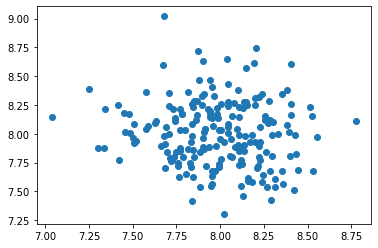

In [50]:
random.seed(13)
x, _ = make_blobs(n_samples=200, centers=1, cluster_std=.3, center_box=(8, 8))
plt.scatter(x[:,0], x[:,1])
plt.show()

## Anomaly Detection with DBSCAN

anom_index: 
 (array([ 53,  90, 166, 167, 188]),)
anom_values: 
 [[7.03687076 8.14332983]
 [8.77762522 8.11243043]
 [7.67991115 9.02033172]
 [7.25127414 8.39130733]
 [8.20379612 8.74691226]]


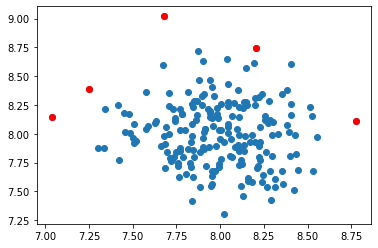

In [51]:
dbscan = DBSCAN(eps = 0.28, min_samples = 20)
# print(dbscan) 
## Fitting the Dbscan and find the index and values of anomalies
pred = dbscan.fit_predict(x)
anom_index = np.where(pred == -1)##it can be with or without the numpy
##or 
# x[dbscan.labels_==-1]
print("anom_index: \n", anom_index)
anom_values = x[anom_index]
print("anom_values: \n", anom_values)
##Plot the DBSCAN with anomalies
plt.scatter(x[:,0], x[:,1])
plt.scatter(anom_values[:,0], anom_values[:,1], color="r")
plt.show()

# Anomaly Detection with SVM

OneClassSVM(gamma=0.001, nu=0.03)


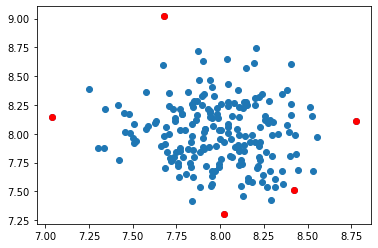

5.992216257678396


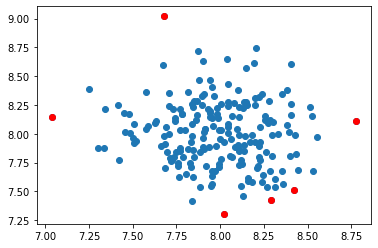

In [58]:
##Anomaly Detection with SVM
#nu is an upper bound on the fraction of training errors and a lower bound of the fraction of support vectors. 
svm = OneClassSVM(kernel='rbf', gamma=0.001, nu=0.03)
print(svm)
svm.fit(x)
#Find anomalies as follows
pred = svm.predict(x)
anom_index = where(pred==-1)
values_anom = x[anom_index]
plt.scatter(x[:,0], x[:,1])
plt.scatter(values_anom[:,0], values_anom[:,1], color="r")
plt.show()

##Anomaly detection with scores
pred = svm.fit_predict(x)
scores = svm.score_samples(x)
#array_like of float, Quantile or sequence of quantiles to compute, which must be between 0 and 1 inclusive.
thresh = quantile(a=scores, q=0.03)
print(thresh)

anom_index_s = where(scores<=thresh)
anom_values_s = x[anom_index_s]
plt.scatter(x[:,0], x[:,1])
plt.scatter(anom_values_s[:,0], anom_values_s[:,1], color="r")
plt.show()


## LOF Anomaly Detection in Python

In [64]:
# data preparation
import pandas as pd
import numpy as np
# data visualzation
import matplotlib.pyplot as plt
import seaborn as sns
# outlier/anomaly detection
from sklearn.neighbors import LocalOutlierFactor

   x  y
0  0  1
1  1  1
2  1  2
3  2  2
4  5  6


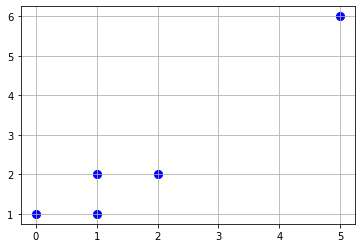

In [67]:
# Generate data
df = pd.DataFrame(np.array([[0,1], [1,1], [1,2], [2,2], [5,6]]), columns = ["x", "y"], index = [0,1,2,3,4])
print(df)

# plot data points
plt.scatter(df["x"], df["y"], color = "b", s = 65)
plt.grid()

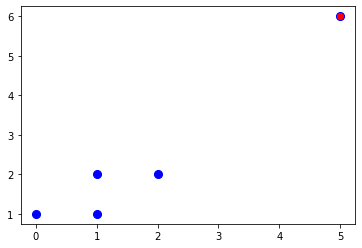

In [68]:
# model specification
model1 = LocalOutlierFactor(n_neighbors = 2, metric = "manhattan", contamination = 0.02)
# model fitting
y_pred = model1.fit_predict(df)
# filter outlier index
outlier_index = where(y_pred == -1) # negative values are outliers and positives inliers
# filter outlier values
outlier_values = df.iloc[outlier_index]
# plot data
plt.scatter(df["x"], df["y"], color = "b", s = 65)
# plot outlier values
plt.scatter(outlier_values["x"], outlier_values["y"], color = "r")

LOF is a semi-supervised ML algorithm where the algorithm is trained only on normal data. After training the algorithm, new data is shown to identify whether it is novel or not.